In [8]:
from qalcore.qiskit.vqls.vqls import VQLS 
from qiskit import Aer
from qiskit.circuit.library.n_local.real_amplitudes import RealAmplitudes
import numpy as np

In [2]:
import numpy as np
from scipy.optimize import minimize

import qiskit 
from qiskit.circuit.library.n_local.real_amplitudes import RealAmplitudes
from qiskit import Aer, transpile, assemble
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister


from qalcore.utils.unitary_decomposition import UnitaryDecomposition
from qalcore.qiskit.utils.circ_utils import vector_creation, get_controlled_matrix, unitarymatrix2circuit
from qalcore.qiskit.utils.circ_utils import get_circuit_state_vector
from qalcore.qiskit.utils.circuit.hadammard_test import HadammardTest
from qalcore.qiskit.utils.circuit.special_hadammard_test import SpecialHadammardTest
from types import SimpleNamespace


In [3]:
A = np.random.rand(8,8)
A = A+A.T

In [4]:
b = np.random.rand(8,1)

In [14]:
from qalcore.qiskit.vqls.vqls import VQLS 
vqls = VQLS(A,b)
ansatz = RealAmplitudes(3, entanglement='linear', reps=2, insert_barriers=False)
backend = Aer.get_backend('aer_simulator')
vqls.backend = backend

In [15]:
unitdecomp_A = UnitaryDecomposition(vqls.A)
unitdecomp_A.decompose(check=True)
unitdecomp_A.normalize_coefficients()
Acirc, Aconjcirc = vqls._get_A_circuit(unitdecomp_A)

In [16]:
norm, Ub_mat = vector_creation(vqls.b, vqls.nqbit, decimals=16)
Ubconjcirc = unitarymatrix2circuit(Ub_mat.transpose(), vqls.backend)

In [17]:
vqls.ansatz = ansatz
hdmr_circ = HadammardTest(ansatz = vqls.ansatz, 
                          operators = [Acirc[0].circuit, Aconjcirc[0].circuit],
                          num_qubits=4,imaginary=True)

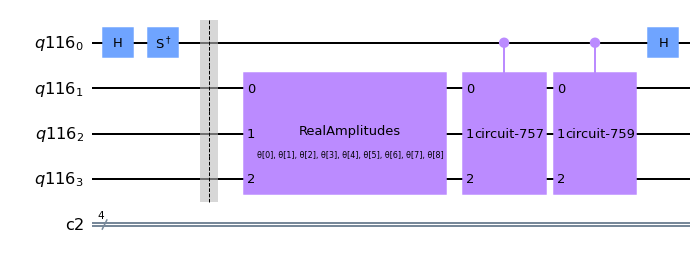

In [18]:
qctl = QuantumRegister(4)
qc = ClassicalRegister(4)
circ = QuantumCircuit(qctl, qc)

circ.compose(hdmr_circ, 
                qubits=list(range(4)), 
                inplace=True)

circ.draw('mpl')

In [19]:
spec_hdmr_circ = SpecialHadammardTest(ansatz = vqls.ansatz, 
                                      operators = [Acirc[0].circuit, Acirc[1].circuit],
                                      num_qubits=4,imaginary=True)

/home/nico/miniconda3/envs/qalcore/lib/python3.8/site-packages/qiskit/visualization/circuit_visualization.py:252: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  image.show()


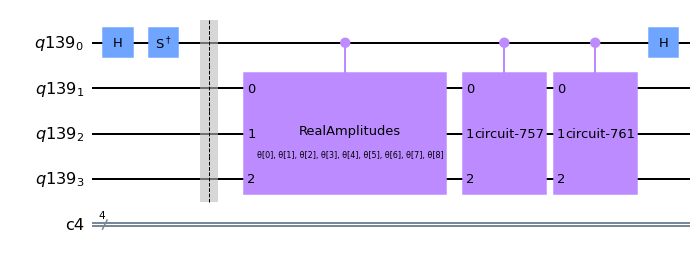

In [22]:
qctl = QuantumRegister(4)
qc = ClassicalRegister(4)
circ = QuantumCircuit(qctl, qc)

circ.compose(spec_hdmr_circ, 
                qubits=list(range(4)), 
                inplace=True)

circ.draw('mpl')

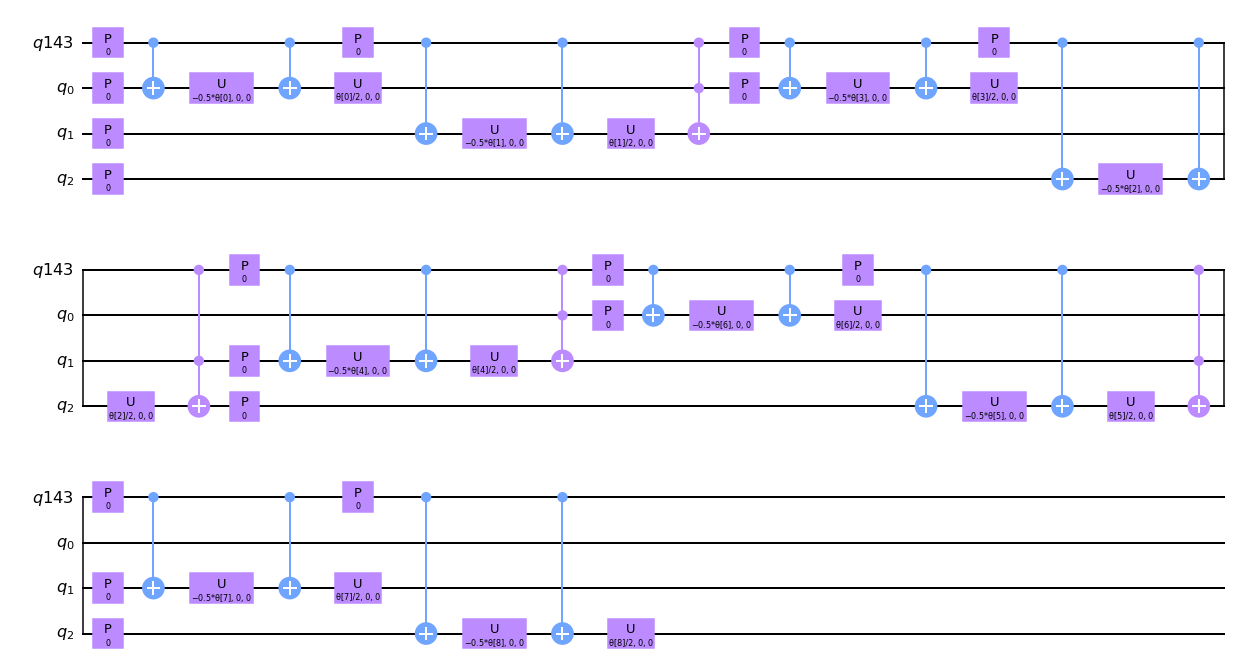

In [28]:
qc = ansatz.control(1).decompose()
qc.draw('mpl')